In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [3]:
dataf = pd.read_csv('Dataset/marketing_campaign.csv', delimiter='\t')
dataf

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [4]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
dataf['Income'] = dataf['Income'].fillna(dataf['Income'].median())
dataf['Income'].isnull().sum()

0

In [6]:
dataf.Education.value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [7]:
dataf["Education"]= dataf["Education"].replace({"Basic": "Undergraduate", "2n Cycle": "Undergraduate", 
                                                "Graduation": "Graduate", "Master": "Postgraduate", 
                                                "PhD": "Postgraduate"})
dataf["Education"]= dataf["Education"].replace({"Undergraduate": 0, "Graduate":1, "Postgraduate":2})
dataf['Education'].value_counts()

1    1127
2     856
0     257
Name: Education, dtype: int64

In [8]:
dataf.Marital_Status.value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [9]:
dataf['Marital_Status'] = dataf['Marital_Status'].replace({'YOLO':'Single', 'Absurd':'Single', 'Divorced':'Alone','Widow':'Single'})
dataf['Marital_Status'] = dataf['Marital_Status'].replace({'Alone':'Single', 'Married':'Together'})
dataf['Marital_Status'] = dataf['Marital_Status'].replace({'Single':0, 'Together':1})
dataf['Marital_Status'].value_counts()

1    1444
0     796
Name: Marital_Status, dtype: int64

In [10]:
dataf["Age"] = 2022 - dataf["Year_Birth"]
dataf["Total_Promotions"] = dataf["AcceptedCmp1"] + dataf["AcceptedCmp2"] + dataf["AcceptedCmp3"] + dataf["AcceptedCmp4"] + dataf["AcceptedCmp5"]
dataf["Children_Number"] = dataf["Kidhome"] + dataf["Teenhome"]
dataf["Total_Spent"] = dataf["MntWines"] + dataf["MntFruits"] + dataf["MntMeatProducts"] + dataf["MntFishProducts"] + dataf["MntSweetProducts"] + dataf["MntGoldProds"]
dataf["Total_Purchases"] = dataf["NumWebPurchases"] + dataf["NumCatalogPurchases"] + dataf["NumStorePurchases"]

In [11]:
dataf = dataf.drop(['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5', 'Kidhome', 'Teenhome',
                   "Dt_Customer", "Z_CostContact", "Z_Revenue", "ID", 'Year_Birth', 'Recency', 'Response'],axis=1)

In [12]:
dataf.Marital_Status.value_counts()

1    1444
0     796
Name: Marital_Status, dtype: int64

In [13]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2240 non-null   int64  
 1   Marital_Status       2240 non-null   int64  
 2   Income               2240 non-null   float64
 3   MntWines             2240 non-null   int64  
 4   MntFruits            2240 non-null   int64  
 5   MntMeatProducts      2240 non-null   int64  
 6   MntFishProducts      2240 non-null   int64  
 7   MntSweetProducts     2240 non-null   int64  
 8   MntGoldProds         2240 non-null   int64  
 9   NumDealsPurchases    2240 non-null   int64  
 10  NumWebPurchases      2240 non-null   int64  
 11  NumCatalogPurchases  2240 non-null   int64  
 12  NumStorePurchases    2240 non-null   int64  
 13  NumWebVisitsMonth    2240 non-null   int64  
 14  Complain             2240 non-null   int64  
 15  Age                  2240 non-null   i

In [14]:
dataf.describe()

,Education,Marital_Status,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Age,Total_Promotions,Children_Number,Total_Spent,Total_Purchases
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1.267411,0.644643,52237.975446,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.009375,53.194196,0.297768,0.950446,605.798214,12.537054
std,0.652347,0.478728,25037.955891,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.096391,11.984069,0.678381,0.751803,602.249288,7.205741
min,0.000000,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,0.000000,0.000000,5.000000,0.000000
25%,1.000000,0.000000,35538.750000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,45.000000,0.000000,0.000000,68.750000,6.000000
50%,1.000000,1.000000,51381.500000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,52.000000,0.000000,1.000000,396.000000,12.000000
75%,2.000000,1.000000,68289.750000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,63.000000,0.000000,1.000000,1045.500000,18.000000
max,2.000000,1.000000,666666.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,129.000000,4.000000,3.000000,2525.000000,32.000000


In [17]:
scaler = MinMaxScaler()
X = scaler.fit_transform(dataf)
Xdf = pd.DataFrame(X, columns=dataf.columns)
Xdf.describe()

,Education,Marital_Status,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Age,Total_Promotions,Children_Number,Total_Spent,Total_Purchases
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,0.633705,0.644643,0.075959,0.203574,0.132172,0.096783,0.144886,0.102901,0.121607,0.155000,0.151290,0.095073,0.445398,0.265826,0.009375,0.264021,0.074442,0.316815,0.238412,0.391783
std,0.326173,0.478728,0.037655,0.225450,0.199867,0.130849,0.210923,0.156960,0.144109,0.128816,0.102915,0.104396,0.250074,0.121332,0.096391,0.116350,0.169595,0.250601,0.238988,0.225179
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.000000,0.050845,0.015908,0.005025,0.009275,0.011583,0.003802,0.024862,0.066667,0.074074,0.000000,0.230769,0.150000,0.000000,0.184466,0.000000,0.000000,0.025298,0.187500
50%,0.500000,1.000000,0.074671,0.116209,0.040201,0.038841,0.046332,0.030418,0.066298,0.133333,0.148148,0.071429,0.384615,0.300000,0.000000,0.252427,0.000000,0.333333,0.155159,0.375000
75%,1.000000,1.000000,0.100099,0.337743,0.165829,0.134493,0.193050,0.125475,0.154696,0.200000,0.222222,0.142857,0.615385,0.350000,0.000000,0.359223,0.000000,0.333333,0.412897,0.562500
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
dataf.to_csv('Dataset/marketing_campaign_processed.csv', index=False)
Xdf.to_csv('Dataset/marketing_campaign_normal_processed.csv', index=False)

## METHODS - EXAMPLE

### HIERARCHIECAL
Distance metric = euclidean

In [321]:
hc_method = 'ward'
distance_metric = 'euclidean'

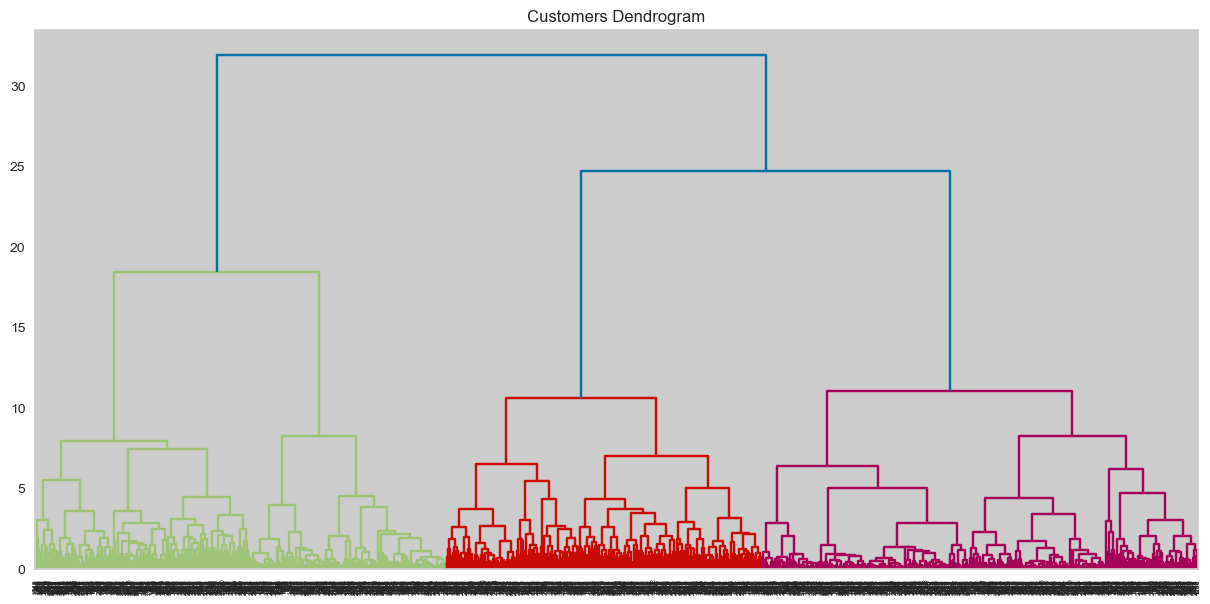

In [322]:
plt.figure(figsize=(15, 7))
plt.title("Customers Dendrogram")

distance_mat = shc.linkage(X, method=hc_method, metric=distance_metric)
clusters = shc.dendrogram(Z=distance_mat)#, truncate_mode='lastp')
plt.show()

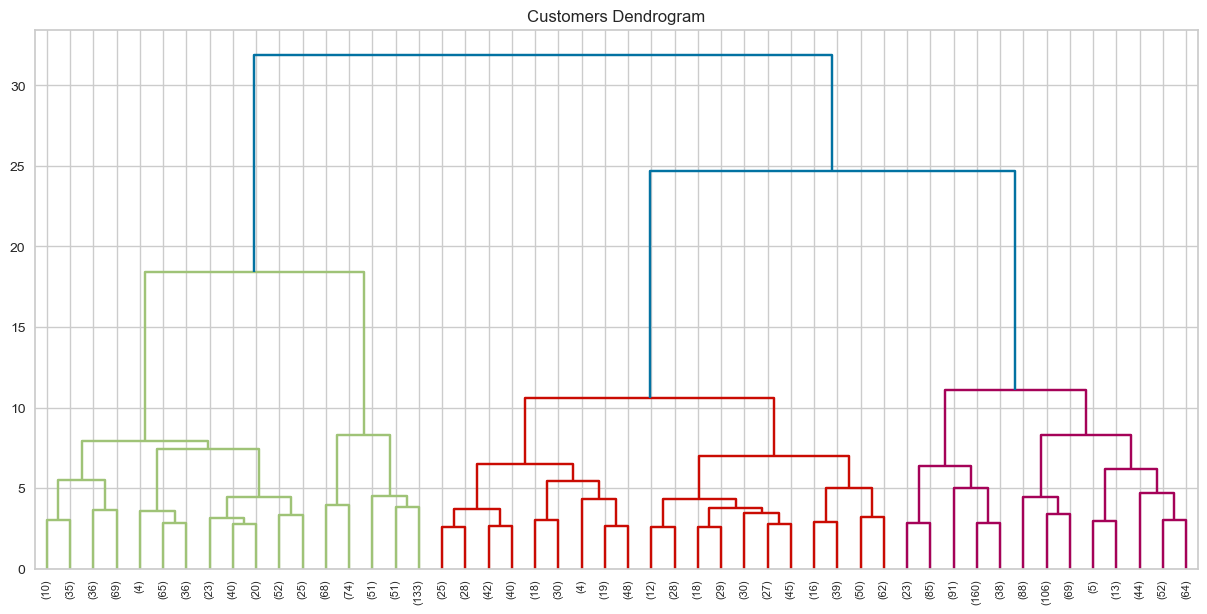

In [323]:
plt.figure(figsize=(15, 7))
plt.title("Customers Dendrogram")

distance_mat = shc.linkage(X, method=hc_method, metric=distance_metric)
clusters =  shc.dendrogram(Z=distance_mat, truncate_mode='lastp', p=50)
plt.show()

In [324]:
print(f"leaves_color_list {np.unique(clusters['leaves_color_list'])}")

leaves_color_list ['C1' 'C2' 'C3']


In [330]:
clustering_model = AgglomerativeClustering(n_clusters = 2, linkage = hc_method, affinity=distance_metric)
clustering_model.fit(X)
hc_clusters = clustering_model.labels_
print(f"The silhouette score for the current model is: {silhouette_score(X, hc_clusters)}")

The silhouette score for the current model is: 0.2895938193604369


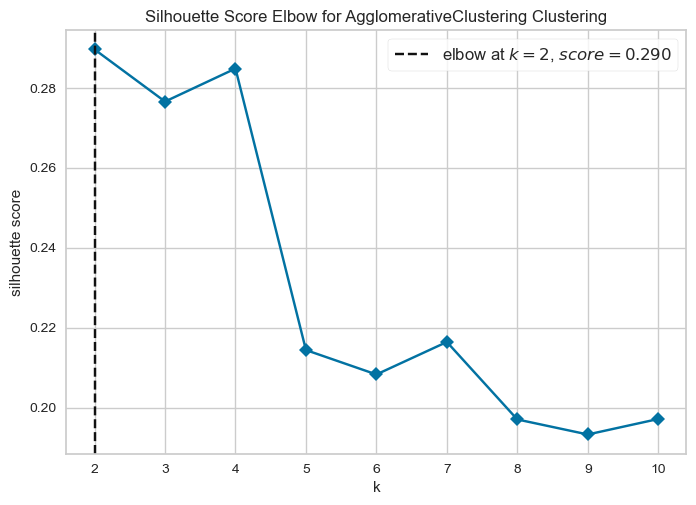

<AxesSubplot:title={'center':'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [331]:
metrics = ['silhouette','distortion','calinski_harabasz']
Elbow_M = KElbowVisualizer(AgglomerativeClustering(linkage=hc_method, affinity=distance_metric), metric = metrics[0], timings=False)
Elbow_M.fit(X)
Elbow_M.show()

### KMEANS
Distance metric = 'euclidean

C:\Users\rafas\anaconda3\envs\ML\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\rafas\anaconda3\envs\ML\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\rafas\anaconda3\envs\ML\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\rafas\anaconda3\envs\ML\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known

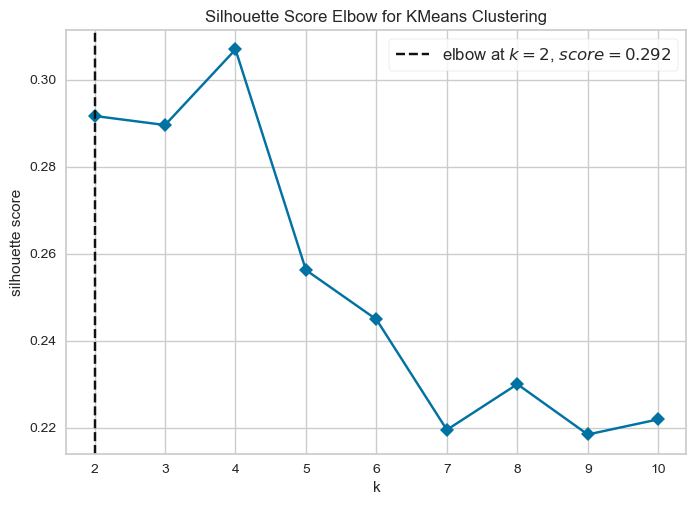

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [332]:
from sklearn.cluster import KMeans
metrics = ['silhouette','distortion','calinski_harabasz']
Elbow_M = KElbowVisualizer(KMeans(), metric = metrics[0], timings=False)
Elbow_M.fit(X)
Elbow_M.show()

In [333]:
pca = PCA(n_components = 2)
pca.fit(X)
PCA_Dataset = pd.DataFrame(pca.transform(X), columns = (["col_1", "col_2"]))
x = PCA_Dataset['col_1']
y = PCA_Dataset['col_2']

In [334]:
kmeans = KMeans(n_clusters=2)
KM_clusters = kmeans.fit_predict(PCA_Dataset)

C:\Users\rafas\anaconda3\envs\ML\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


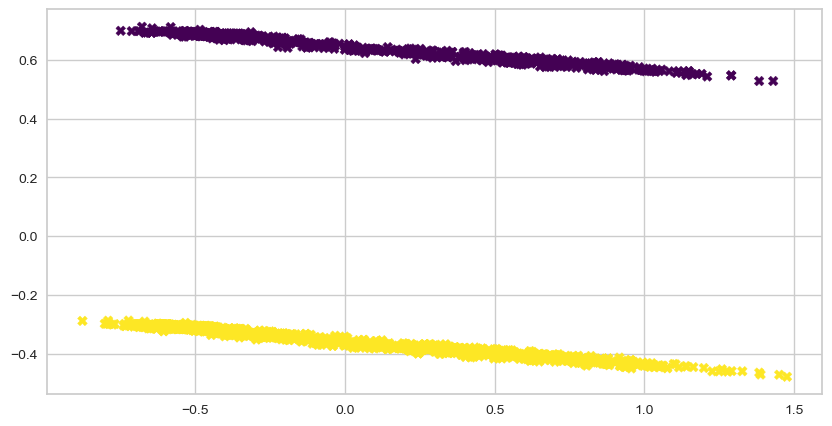

In [336]:


# Plotting and describing the graph.
fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot(111)
ax.scatter(x, y, c=KM_clusters, marker= "X", cmap = 'viridis')
plt.show()

### PROBABILISTIC

In [419]:
pca = PCA(n_components = 3)
pca.fit(X)
PCA_Dataset = pd.DataFrame(pca.transform(X), columns = (["col_1", "col_2","col_3"]))
x = PCA_Dataset['col_1']
y = PCA_Dataset['col_2']
z = PCA_Dataset['col_3']

C:\Users\rafas\anaconda3\envs\ML\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


0.29166912423891816


C:\Users\rafas\anaconda3\envs\ML\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


0.24803106042741885


C:\Users\rafas\anaconda3\envs\ML\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


0.2066342614478796


C:\Users\rafas\anaconda3\envs\ML\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


0.1898502071598554


C:\Users\rafas\anaconda3\envs\ML\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


0.19245264911223248


C:\Users\rafas\anaconda3\envs\ML\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


0.19729004112474013


C:\Users\rafas\anaconda3\envs\ML\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


0.11846595051590714


C:\Users\rafas\anaconda3\envs\ML\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


0.15302023757782218


C:\Users\rafas\anaconda3\envs\ML\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


0.16679141524164606


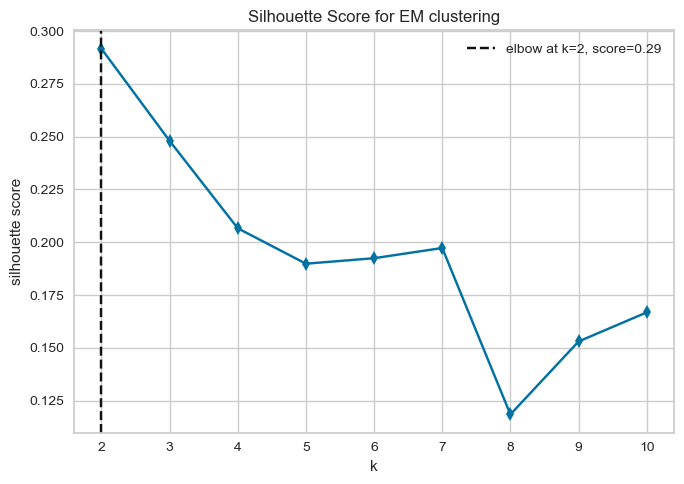

In [467]:
from sklearn.cluster import KMeans

scores = []
for k in range(2,11):
    
    gm = GaussianMixture(n_components=k, init_params='kmeans').fit(X)
    gm_clusters = gm.predict(X)
    score = silhouette_score(X, gm_clusters)
    scores.append(score)
    print(score)

k_clusters = np.argmax(scores)

fig = plt.figure(figsize = (7, 5))
ax = fig.add_subplot(111)
ax.plot(list(range(2,11)), scores, color='b', marker='d')
ax.axvline(k_clusters+2, color='k',linestyle='--', label=f'elbow at k={k_clusters+2}, score={np.round(scores[(k_clusters)],2)}')
ax.set_xlabel('k')
ax.set_ylabel('silhouette score')
ax.set_title('Silhouette Score for EM clustering')
plt.legend(framealpha=1)
plt.tight_layout()
plt.show()

In [468]:
from sklearn.mixture import GaussianMixture #implements EM algorithm

gm = GaussianMixture(n_components=2, init_params='kmeans',random_state=34).fit(PCA_Dataset)
gm_clusters = gm.predict(PCA_Dataset)

C:\Users\rafas\anaconda3\envs\ML\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


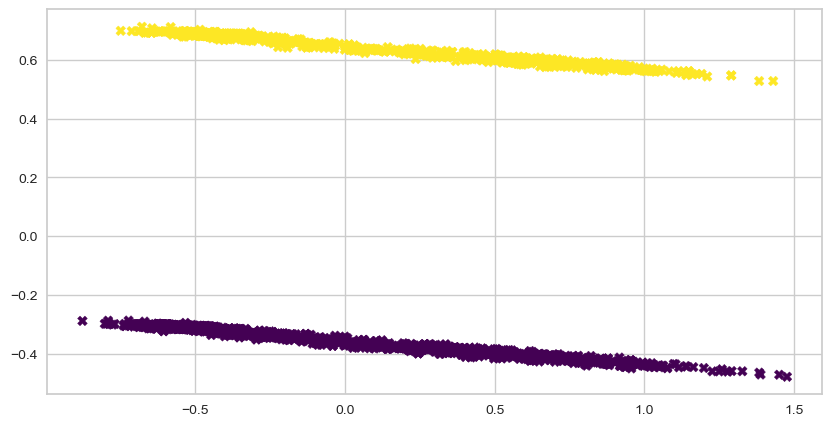

In [469]:
# Plotting and describing the graph.
fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot(111)
ax.scatter(x, y, c=gm_clusters, marker= "X", cmap = 'viridis')
plt.show()